## Import Packages

In [1]:
# Load libraries
import math
import numpy as np
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(5,5), dpi=100)
plt.rc('font', size=8)

## Generate data

In [2]:
from numpy.random import seed
seed(1234)
N = 1000  # num_samples_per_class
C = 2 # num of class
D = 2 # number of dimension
X = np.zeros((N * C, D))
y = np.zeros((N * C))
for c in range(C):
    index = 0
    t = np.linspace(0, 1, N)
    inner_var = np.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + np.random.normal(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * np.float32((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (2000, 2)
y: (2000,)


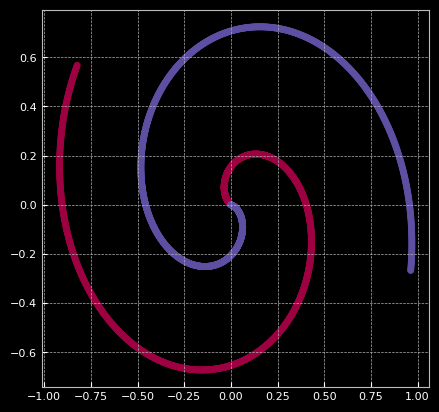

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

## Build Model

In [4]:
def build_network(X, y, input_dim, Hidden, activation='linear', epoch=200):
    # Define model layers
    input  = Input(shape=(input_dim,))    
    layer1 = Dense(Hidden)(input)
    layer1 = Activation(activation)(layer1)
    output = Dense(1, activation='sigmoid')(layer1)
    model  = Model(inputs=input, outputs=output)
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(1e-3), 
                  metrics=['accuracy'])

    # Training
    model.fit(X, y, epochs=epoch, verbose=0)
    
    # Prediction
    prediction = model.predict(X)
    accuracy = accuracy_score(y, prediction>0.50)
    print(f'Accuracy is {accuracy}\n')
    
    # Plot decision Boundary`
    plt.figure(dpi=150)
    plt.title(f'Model Decision Boundary (hidden unit {Hidden}) for {activation} activation. Total Model accuracy is {accuracy}')    
    plot_decision_regions(X, y.astype(int).ravel(), clf=model, legend=2)
    plt.axis('off')
    return model

## Model with Linear activation

Accuracy is 0.5065



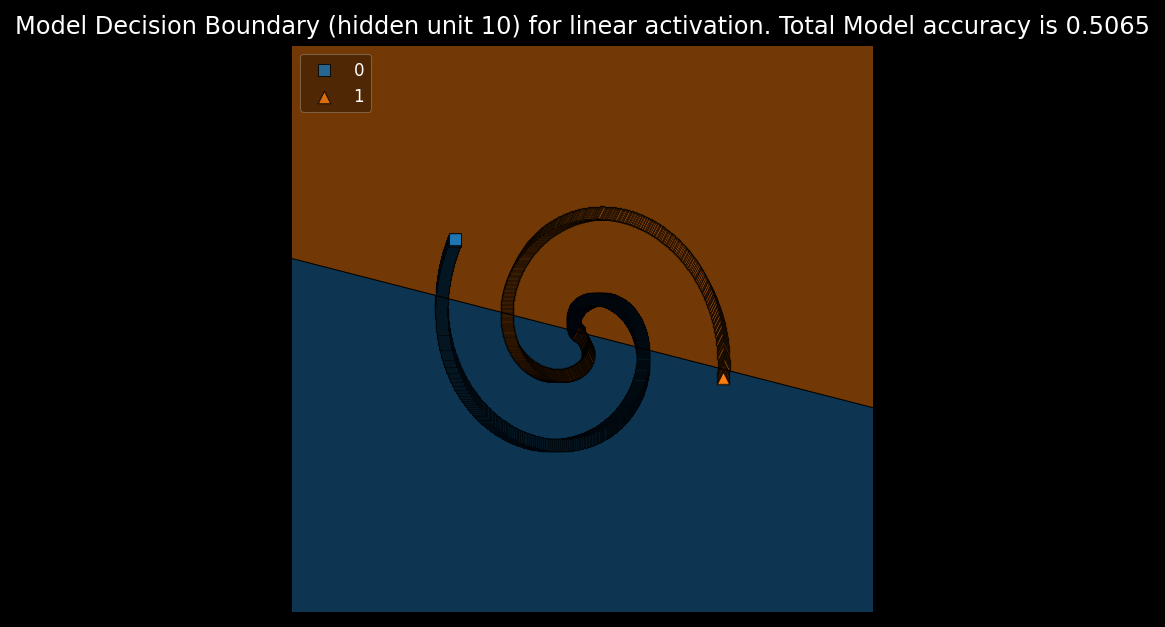

In [5]:
linear_activation_model = build_network(X, y, input_dim=2, Hidden=10, activation='linear',epoch=200)

## Model with relu activation

A neural network learns by accumulation of all the bits and pieces learnt by each neuron. This is the same as how we can approximate a curved function by putting together many line segments

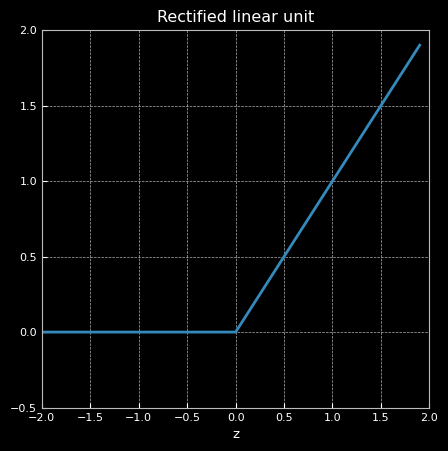

In [6]:
z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y1 = np.max([zero, z], axis=0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y1)
ax.set_ylim([-0.5, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')
plt.show()

Accuracy is 0.992



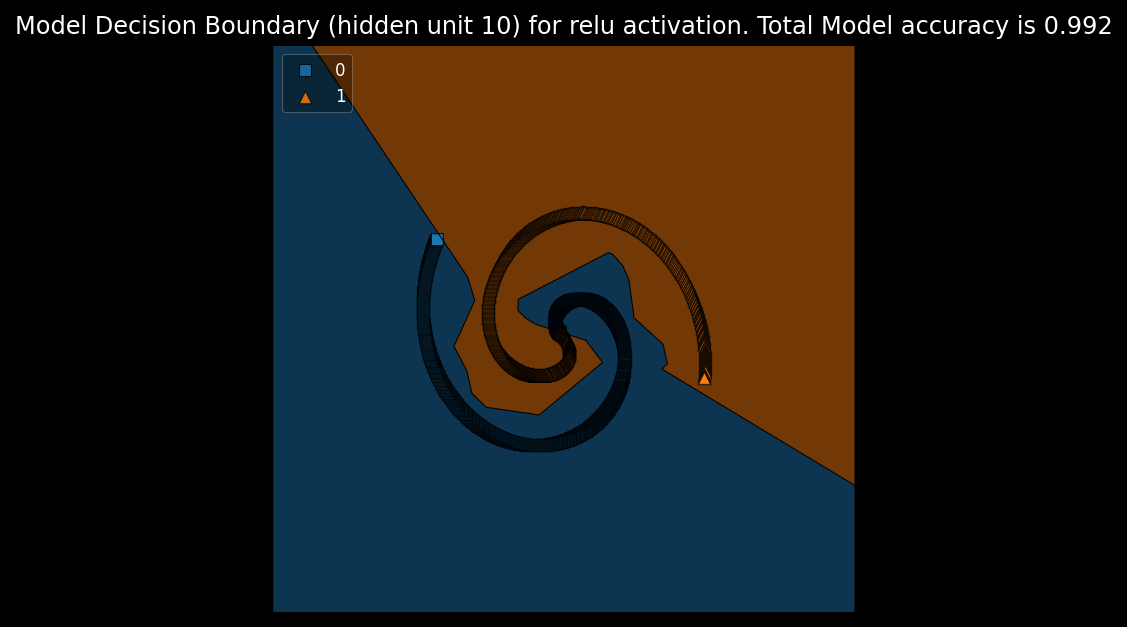

In [7]:
tanh_activation_model = build_network(X, y, input_dim=2, Hidden=10, activation='relu',epoch=200)

## How model decision boundary changes for relu activation

As the number of hidden layes increases, the output layer combines the separation made by hidden neuron in a unique decision, by enabling the overall architecture to separate regions in a complex non-linear way

Accuracy is 0.6905

Accuracy is 0.692

Accuracy is 0.753

Accuracy is 0.937

Accuracy is 0.873

Accuracy is 0.955

Accuracy is 0.9885

Accuracy is 0.9515

Accuracy is 0.9875

Accuracy is 0.9915



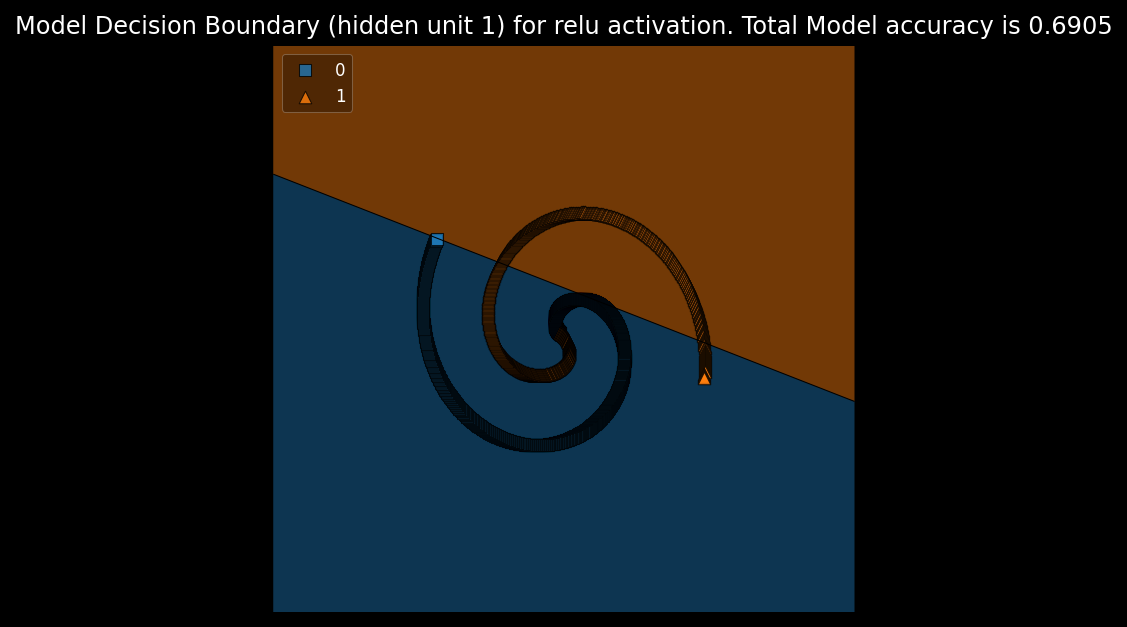

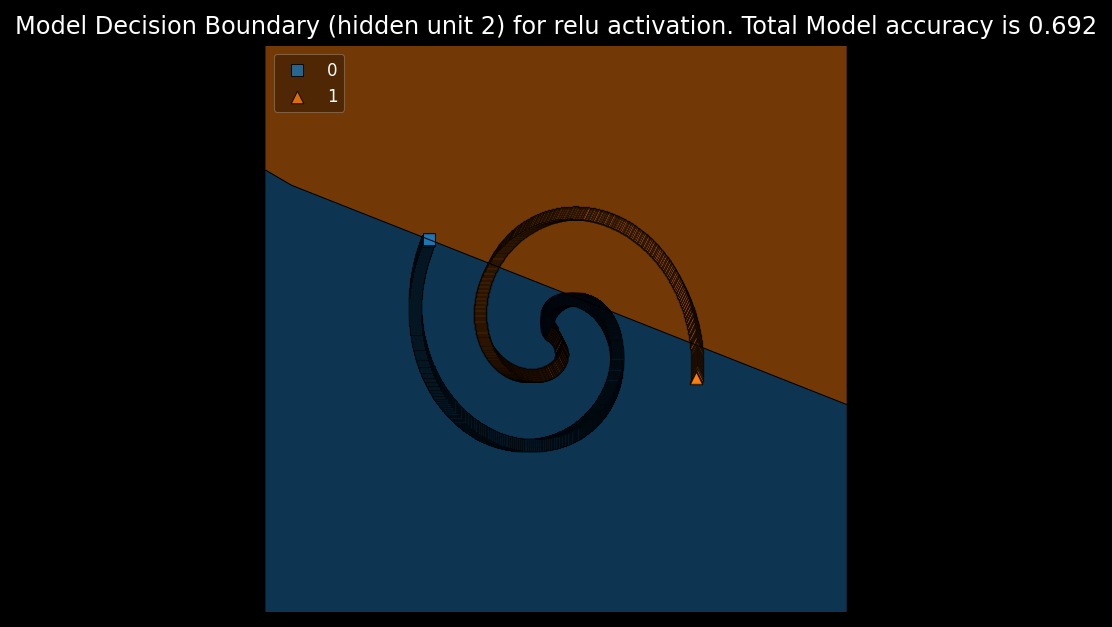

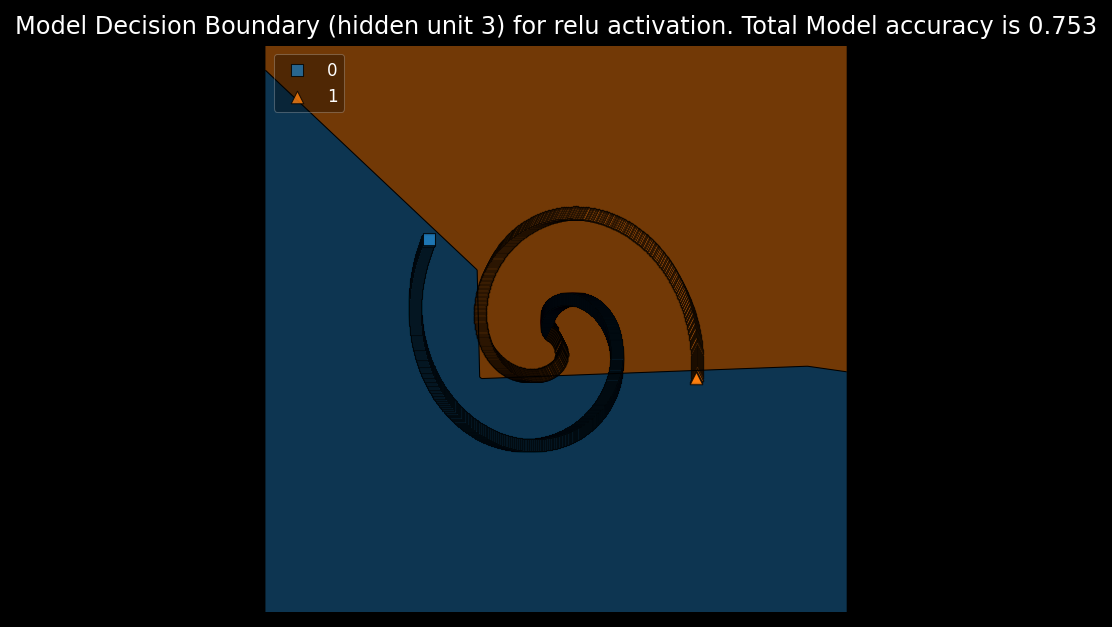

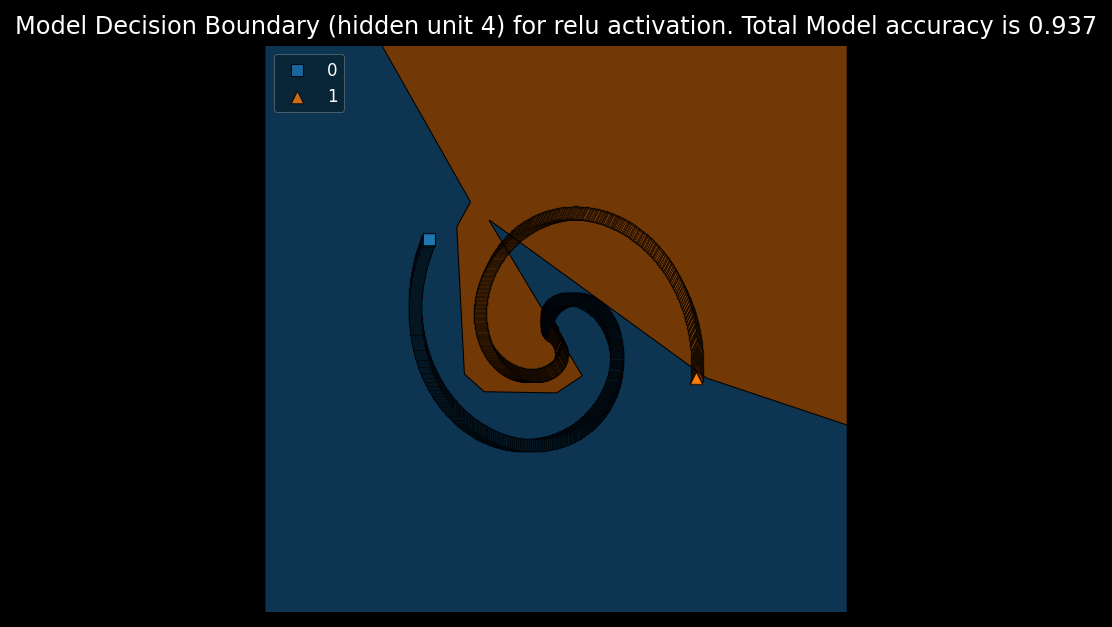

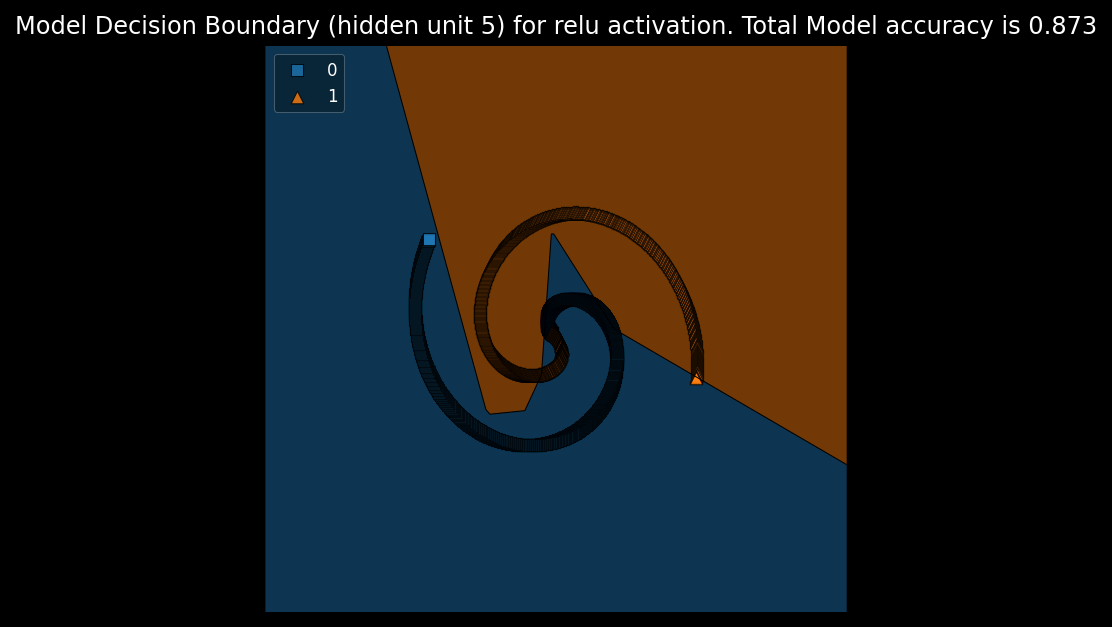

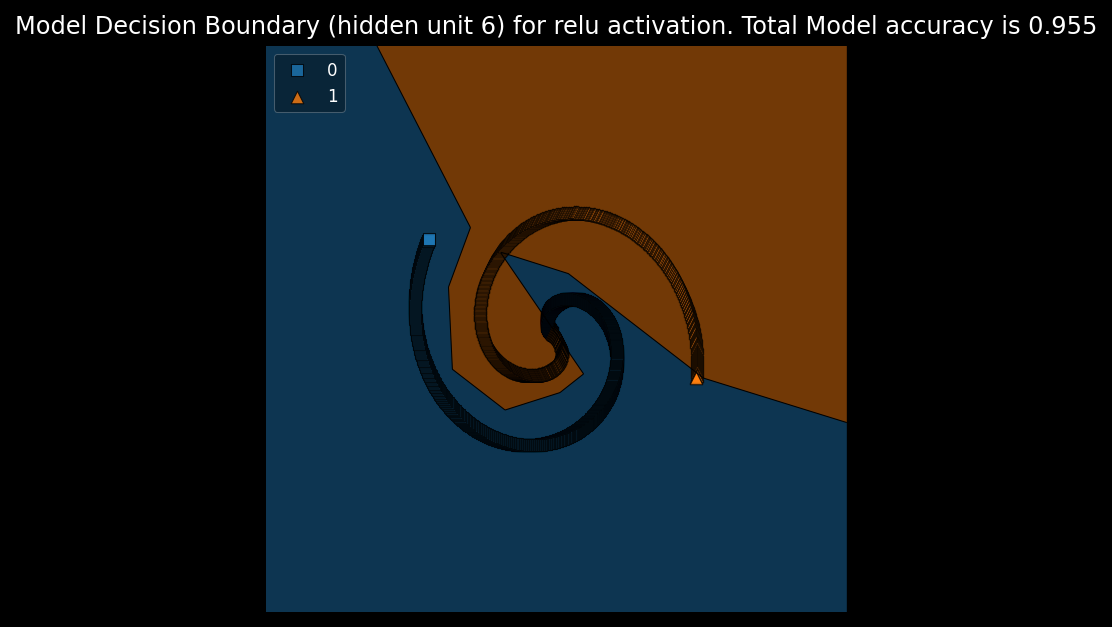

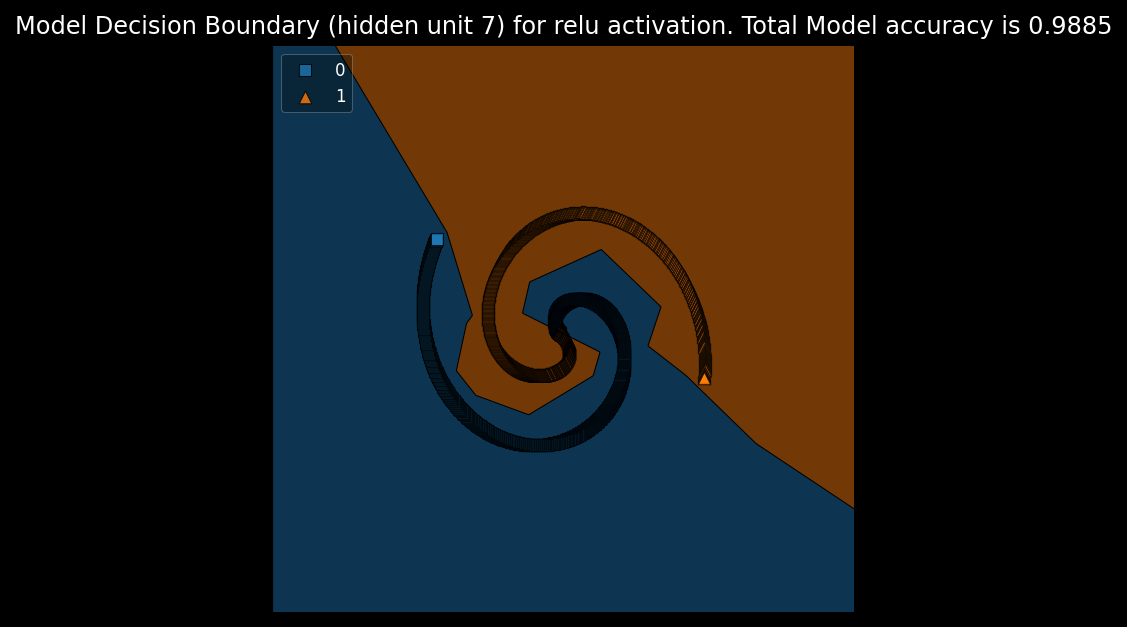

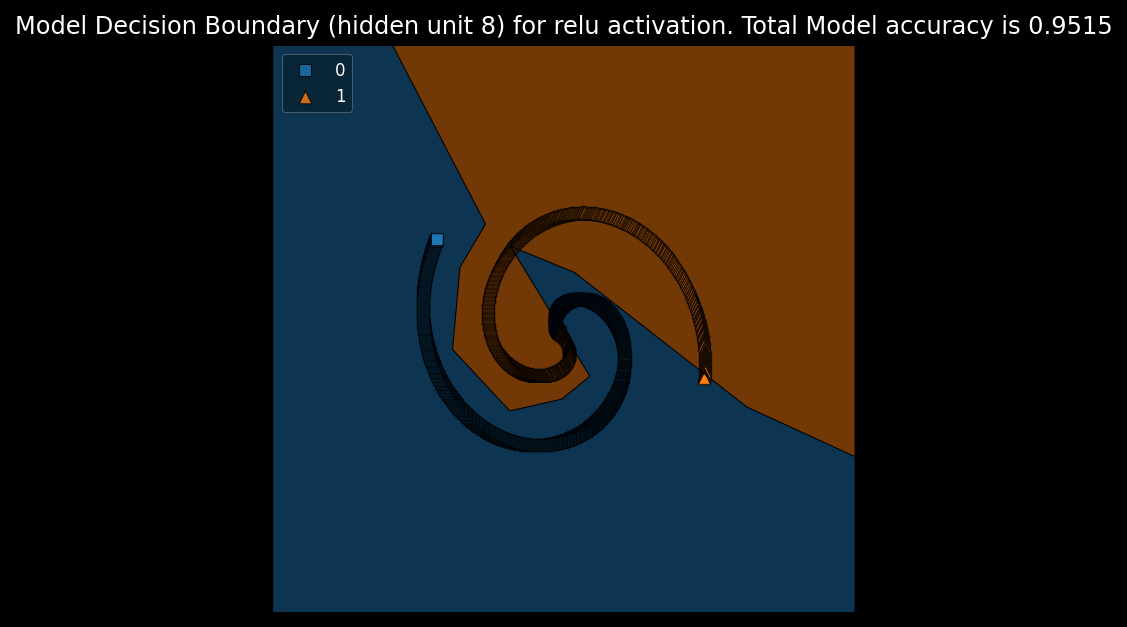

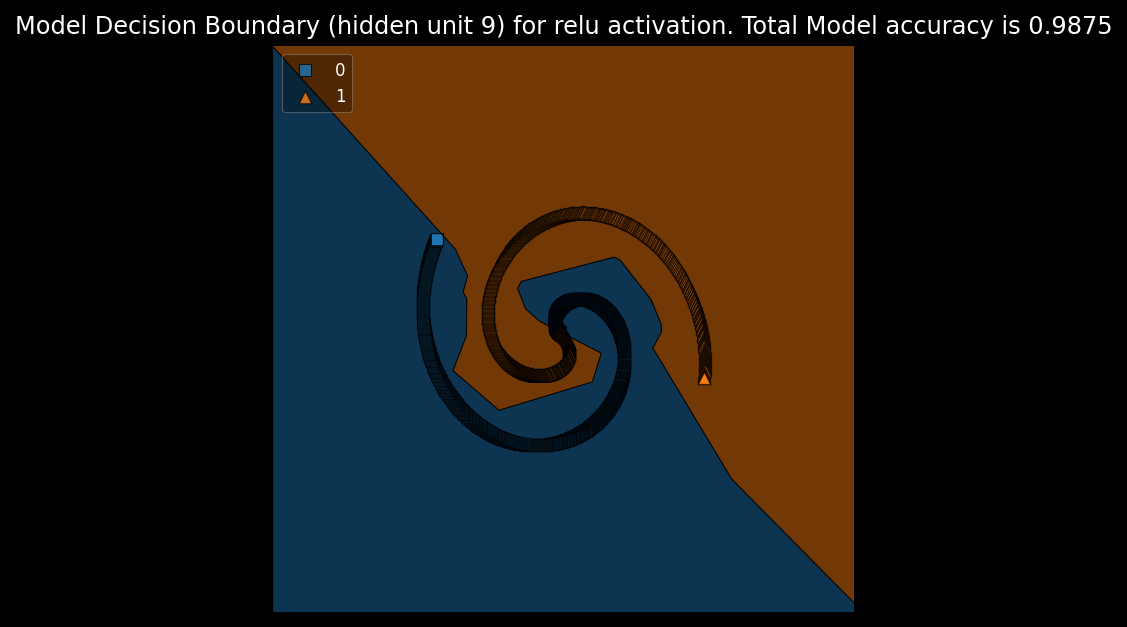

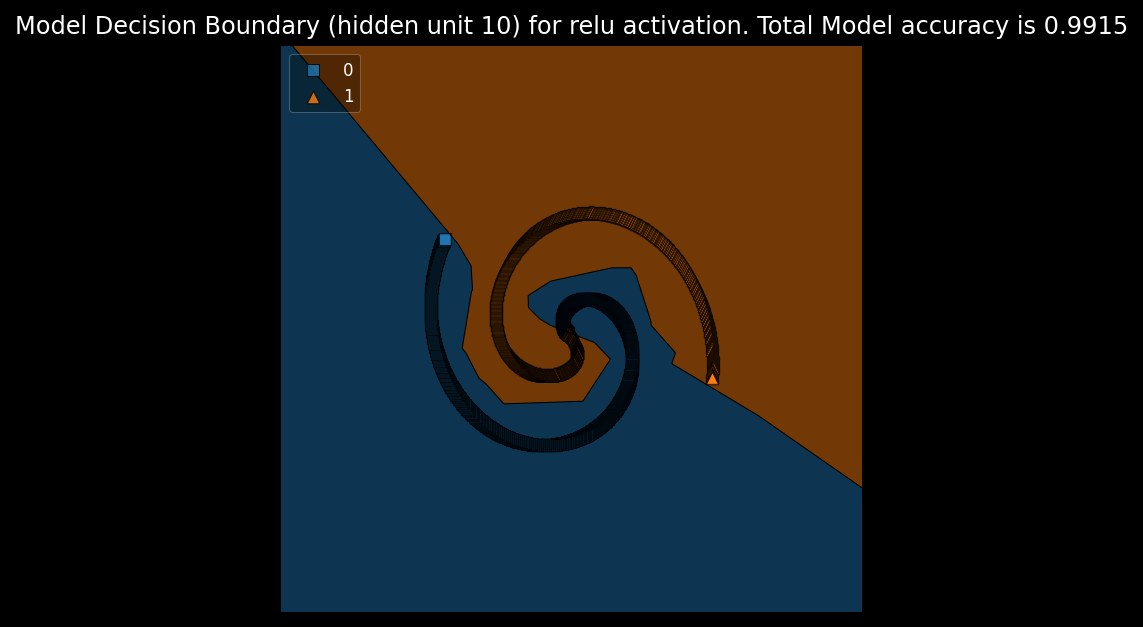

In [9]:
for hidden_unit in range(1, 11):
    model = build_network(X, y, input_dim=2, Hidden=hidden_unit, activation='relu',epoch=200)